In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lsst.sims.utils import angularSeparation

In [2]:
fname = '/global/projecta/projectdirs/lsst/groups/SSim/DC2/cosmoDC2_v1.1.4/ddf_region_galaxy_catalog/DDF_sn_host_pairs.csv'

In [3]:
df = pd.read_csv(fname)

In [4]:
df['sn_host_sep'] = angularSeparation(df.snra_in.values, df.sndec_in.values, df.ra.values, df.dec.values)*60. * 60. 
# to go to arc-sec from degrees

In [5]:
df.columns

Index(['galaxy_id', 'htmid_level_6', 'c_in', 'mB', 't0_in', 'x0_in', 'x1_in',
       'z_in', 'snid_in', 'snra_in', 'sndec_in', 'mag_true_i_lsst',
       'size_minor_bulge_true', 'mag_true_z_lsst', 'size_bulge_true',
       'mag_true_r_lsst', 'morphology/diskHalfLightRadiusArcsec', 'dec',
       'ellipticity_1_bulge_true', 'mag_true_u_lsst', 'dec_true',
       'ellipticity_1_disk_true', 'ra', 'position_angle_true',
       'mag_true_Y_lsst', 'stellar_mass', 'ra_true', 'stellar_mass_disk',
       'mag_true_g_lsst', 'bulge_to_total_ratio_i', 'ellipticity_2_bulge_true',
       'morphology/positionAngle', 'size_disk_true', 'size_minor_disk_true',
       'morphology/spheroidHalfLightRadiusArcsec', 'ellipticity_2_disk_true',
       'stellar_mass_bulge', 'redshift_true', 'sn_host_sep'],
      dtype='object')

In [6]:
df['ratio_disk_size'] = df.sn_host_sep / df['size_disk_true']
df['ratio_disk_minor_size'] = df.sn_host_sep / df['size_minor_disk_true']
df['ratio_bulge_size'] = df.sn_host_sep / df['size_bulge_true']
df['ratio_bulge_minor_size'] = df.sn_host_sep / df['size_minor_bulge_true']

In [10]:
df.to_csv('distances.csv.gz', compression='gzip')

In [8]:
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.5)

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
fig, ax = plt.subplots(2, sharex=True, figsize=(6,6))
_ = ax[0].hist(df.ratio_disk_size, bins=np.arange(0., 10., 0.1), density=True, histtype='step', label='size = major_axis')
_ = ax[0].hist(df.ratio_disk_minor_size, bins=np.arange(0., 10., 0.1), density=True, histtype='step', label='size = minor_axis')
ax[0].set_title('Disk')
_ = ax[1].hist(df.ratio_bulge_size, bins=np.arange(0., 10., 0.1), density=True, histtype='step', label='size = major_axis')
_ = ax[1].hist(df.ratio_bulge_minor_size, bins=np.arange(0., 10., 0.1), density=True, histtype='step', label='size = minor_axis')
ax[1].set_title('Bulge')
ax[1].set_xlabel('Host SN sep / galaxy size')
ax[0].set_ylabel('PDF')
ax[1].set_ylabel('PDF')
plt.legend(loc='best')
fig.savefig('sn_host_separation_in_units_of_galaxy_size.pdf')

## Scratch

/cvmfs/sw.lsst.eu/linux-x86_64/lsst_sims/sims_2_13_1/python/miniconda3-4.5.4/envs/lsst-scipipe-fcd27eb/lib/python3.6/site-packages/matplotlib/font_manager.py:278: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


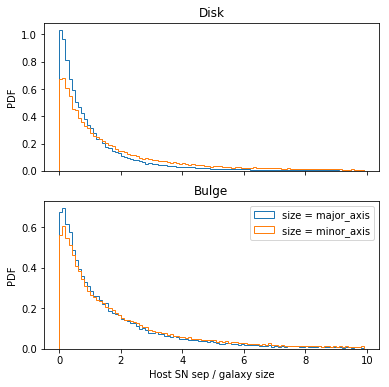

In [7]:
fig, ax = plt.subplots(2, sharex=True, figsize=(6,6))
_ = ax[0].hist(df.ratio_disk_size, bins=np.arange(0., 10., 0.1), density=True, histtype='step', label='size = major_axis')
_ = ax[0].hist(df.ratio_disk_minor_size, bins=np.arange(0., 10., 0.1), density=True, histtype='step', label='size = minor_axis')
ax[0].set_title('Disk')
_ = ax[1].hist(df.ratio_bulge_size, bins=np.arange(0., 10., 0.1), density=True, histtype='step', label='size = major_axis')
_ = ax[1].hist(df.ratio_bulge_minor_size, bins=np.arange(0., 10., 0.1), density=True, histtype='step', label='size = minor_axis')
ax[1].set_title('Bulge')
ax[1].set_xlabel('Host SN sep / galaxy size')
ax[0].set_ylabel('PDF')
ax[1].set_ylabel('PDF')
plt.legend(loc='best')
fig.savefig('sn_host_separation_in_units_of_galaxy_size.pdf')

## 